# Test the causality of the filters provided by ObsPy

In [17]:
# Imports
from numpy import array, zeros
from matplotlib.pyplot import subplots
from obspy import Trace, UTCDateTime

In [18]:
# Input
starttime = UTCDateTime("2020-01-01T00:00:00")
sampling_rate = 1000
numpts = 1001

In [19]:
# Generate the delta function
delta = zeros(numpts)
delta[500] = 1

trace = Trace(data=array(delta), header={"starttime": starttime, "sampling_rate": sampling_rate})

In [20]:
# Filter the trace using a causal and an acausal filter
trace_causal = trace.copy()
trace_causal.filter("lowpass", freq=100, corners=4, zerophase=False)
trace_acausal = trace.copy()
trace_acausal.filter("lowpass", freq=100, corners=4, zerophase=True)

... | 2020-01-01T00:00:00.000000Z - 2020-01-01T00:00:01.000000Z | 1000.0 Hz, 1001 samples

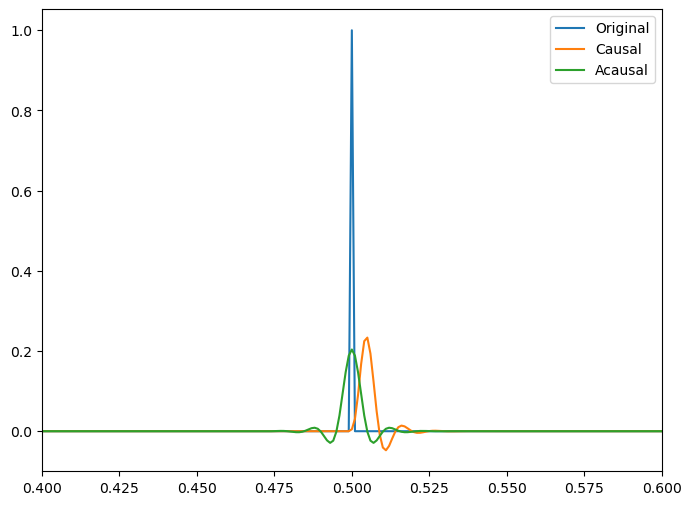

In [21]:
# Plot the traces
timeax = trace.times()

fig, ax = subplots(1, 1, figsize=(8, 6))
ax.plot(timeax, trace.data, label="Original")
ax.plot(timeax, trace_causal.data, label="Causal")
ax.plot(timeax, trace_acausal.data, label="Acausal")
ax.set_xlim(0.4, 0.6)
ax.legend()